# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2020
## Домашнее задание 6. Проверка гипотез.
### Дедлайн --- 21 декабря 9:00

Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

Информация о выполнении и курсе в целом есть в <a href=https://docs.google.com/document/d/1kd85QRAS8fbxRxpMzP2IsbQ_YcVsU-Aczqd6ErXgIDg/edit#>этой папке</a>.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook и его pdf-версия с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается **в 10 баллов**.

In [1]:
import numpy as np

import seaborn as sns

from matplotlib import pyplot as plt

from ipywidgets import interactive
from IPython import display

from scipy import stats as sps

sns.set(style="whitegrid", font_scale=1.4)

## Задание 1 (Корреляция)

В этом задании вы на практике увидите, как коэффициенты корреляции реагируют на выбросы в данных, а также познакомитесь с виджетами. Если некоторые импорты поломались, то продолжите работу в [колабе](https://colab.research.google.com).

Итак, наша задача – сгенерировать (почти) линейно зависимую выборку и добавить в нее выбросы.

Начнем с первого: сгенерируйте выборку из двух столбцов 
$$
Y = 10 \cdot X + \varepsilon
$$
где $X$ и $\varepsilon$ из стандартного нормального распределения. Выборка состоит из двух столбцов $X$ и $Y$. **Размер выборки — 100 элементов**.

*Совет:* в данном случае проще использовать `np.random.randn` и `np.hstack`.

In [38]:
def generate_linear_sample():
    np.random.seed(42)
    data_x = np.random.randn(100)
    data_y = 10*data_x + np.random.randn(100)
    data = np.hstack((data_x.reshape(100, 1), data_y.reshape(100, 1)))
    return data

Теперь займемся выбросами (outliers). Генерировать их будем следующим образом: для первых `outliers_num` элементов мы поменяем значение $X$ на случайную величину из стандартного распределения (`np.random.randn`), а значение $Y$ сделаем равное `outlier_bias`.

In [39]:
def add_outliers(data: np.ndarray, outliers_num: int, outlier_bias: float) -> np.ndarray:
    np.random.seed(42)
    new_X_values = np.random.randn(outliers_num)
    new_Y_values = np.tile(outlier_bias, outliers_num)
    data[list(range(outliers_num))] = np.hstack((new_X_values.reshape(outliers_num, 1), new_Y_values.reshape(outliers_num, 1)))
    return data

Теперь создадим функцию, которая генерирует выборку и считает коэффициенты корреляции. Итак, посчитайте коэффициенты корреляции Пирсона и Спирмана, а так же уровень достигаемой значимости при проверки гипотезы о некоррелированности $X$ и $Y$ для каждого из коэффициентов (все делается одной функцией из `scipy.stats`). Затем в этой же функции постройте график (scatter). Отметьте все выбросы красным, а остальные точки синим. **В заголовке графика** напишите коэффициенты корреляции, округленные до четырех знаков после запятой. Например так 
```
f"Pearson correlation {p_corr:.4f}\n Spearman correlation {s_corr:.4f}"
```
И верните уровни достигаемой значимости (**p-value**) критериев о некоррелированности.

In [48]:
def plot_correlation(outliers_num: int = 2, outlier_bias: float = 10, show=True):
    np.random.seed(42)
    data = generate_linear_sample()
    data = add_outliers(data, outliers_num, outlier_bias)
    plt.figure(figsize=(12, 8))
    p_corr, p_p_val = sps.pearsonr(data[:, 0], data[:, 1])
    s_corr, s_p_val = sps.spearmanr(data[:, 0], data[:, 1])
    plt.title(
        f"Pearson correlation {p_corr:.4f}\n Spearman correlation {s_corr:.4f}"
    )
    plt.scatter(data[:,0][:outliers_num], data[:,1][:outliers_num:], label = "outliner", color = "red")
    plt.scatter(data[:,0][outliers_num:], data[:,1][outliers_num:], label = "data values", color = "blue")
    plt.legend()
    if show:
        plt.show()
    else:
        plt.close()
    return p_p_val, s_p_val

Чтобы убедится, что все ок, вызовите функцию с параметрами по умолчанию ниже.

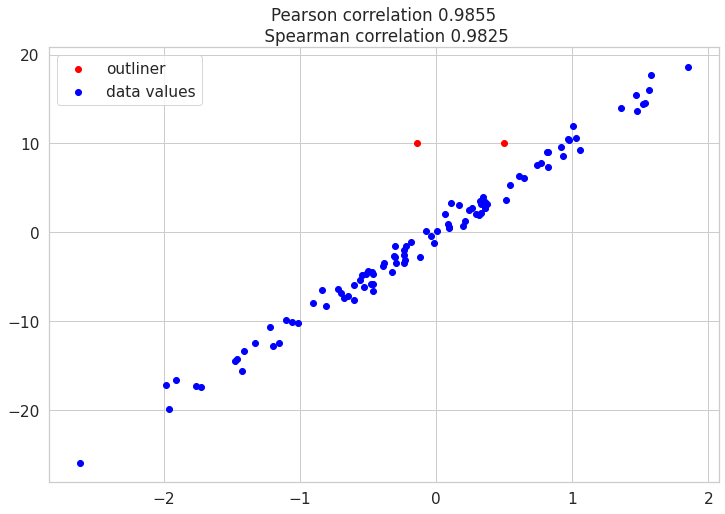

(2.9204970510595513e-77, 2.2377121996722538e-73)

In [49]:
plot_correlation()

Часто, чтобы смотреть за изменением величин в зависимости от параметров бывает удобно использовать виджеты. Мы будем пользоваться самой простой функцией из этой библиотеки – `interactive`. Она позволяет быстро создать ползунки соответствующие аргументу функции, нужно лишь указать краевые значения параметров.

In [50]:
v = interactive(
    plot_correlation, outliers_num=(1, 10), outlier_bias=(-300., 300.)
)

После этого осталось лишь отобразить наш виджет.

In [51]:
display.display(v)

interactive(children=(IntSlider(value=2, description='outliers_num', max=10, min=1), FloatSlider(value=10.0, d…

Поиграйтесь с ползунками, посмотрите как коэффициенты корреляции реагируют на выбросы. Сделайте вывод.


Если зафиксировать размер отклонения и измененять количество выбросов, то оба коэффициента изменяются приблизительно одинаково. Если зафиксировать количество выбросов и изменять размер выбросов, то коэффициент пирсона разительно ухудшается, тогда как коэффициент Спирмена остается почти таким же 


**Вывод:** Коэффициент Спирмена лучше подходит для выборок, где присутствуют выбросы

Давайте зафиксируем число выбросов `outliers_num=5`. Для параметра `outlier_bias` в интервале от $-300$ до $0$ (`np.linspace`)  посчитайте значения `p_value` (достигаемый уровень значимости) для обоих критериев. Постройте график зависимости `p_value` от **модуля** отклонения остатков (`outlier_bias`). Должны получиться две линии для двух коэффициентов корреляции. А также постройте вспомогательную красную линию `plt.hlines` на уровне $0.05$. Не забудьте про легенду!

In [55]:
outlier_bias_values = np.linspace(0, -300, 100)
p_values = np.array([plot_correlation(outliers_num=5, outlier_bias=i, show=False) for i in outlier_bias_values])

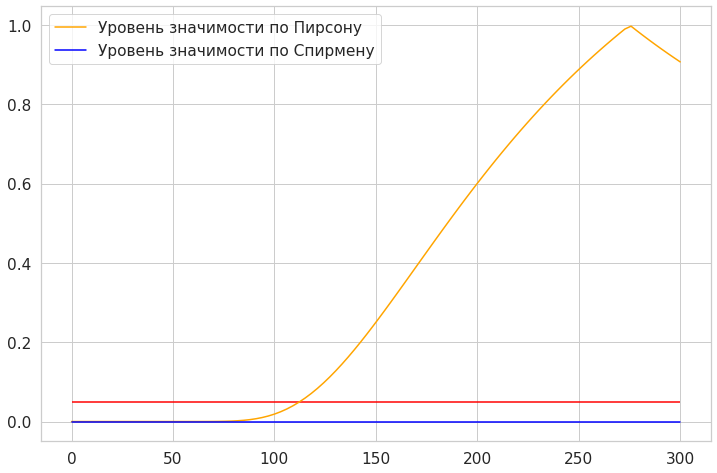

In [59]:
plt.figure(figsize=(12, 8))
plt.plot(abs(outlier_bias_values), p_values[:,0], label = "Уровень значимости по Пирсону", color = "orange")
plt.plot(abs(outlier_bias_values), p_values[:,1], label = "Уровень значимости по Спирмену", color = "blue")
plt.hlines(0.05, xmin=0, xmax=300, color='red')
plt.legend()
plt.show()

Сделайте вывод по полученному графику.

**Вывод:** Можно заметить что критерий корреляции Спирмена лучше подходит для проверки гипотез, так как выбросы в данных почти никак не влияют на его уровень значимости(вероятность неприятия верной гипотезы)

## Задание 2 (Мощность критерия)

В реальной жизни аналитика самая распространенная задача это A/B-тестирование. Оно применяется практически везде, где это возможно. Идея проста: разбиваем людей на две группы A и B. Группе A мы даем продукт без изменений (принято называть эту группу `placebo`, даже когда речь не идет о медицине), а группе B (`treatment`) мы даем продукт, с каким-то изменением. Мы хотим понять, полезно ли нам предложенное изменение. Поэтому мы считаем какую-то метрику для двух этих групп и пытаемся понять, значимо ли изменение. Однако важный вопрос понять необходимый размер групп A и B.


Давайте представим себе такой случай: студент ведет два паблика с мемами. Один про лектора по статам, а другой про лектора по теории меры. Но наступает сессия, и времени у него остается немного, поэтому он думает о том чтобы закрыть первый паблик, потому что мемы в нем уже не актуальны и лайкают их мало. Вы, как опытный эксперт, можете довольно точно прикинуть распределение лайков под записями. По вашему мнению оба распределения нормальные. Для первого паблика: $\mu_1 = 35$ $\sigma_1 = 30$, для второго: $\mu_2 = 55$ $\sigma_2 = 30$. Считаем, что аудитории пабликов не пересекаются. Вы хотите убедить студента, что ему выгодно закрывать именно первый паблик и сконцентрироваться на втором, но он вам не верит и требует статистически доказать правоту: он требует, чтобы мощность критерия была не менее не менее $0.95$, а уровень значимости $\alpha = 0.05$. Вы предлагаете ему следующий сценарий: чтобы избежать влияние других факторов нужно выкладывать мемы в двух пабликах одновременно раз в день. Необходимо понять сколько дней требуется для подведения итогов.

Введем обозначения для количества лайков: $X$ ~ $N(\mu_1, \sigma^2_1)$; $Y$ ~ $N(\mu_2, \sigma^2_2)$.

Для проверки гиоптезы вы предложили воспользоваться Z-критерием для односторонней альтернативы:

$H_0: \mu_1 = \mu_2$ vs $H_1: \mu_2 > \mu_1$.

Статистика этого критерия выглядит так: $$\dfrac{\overline{Y} - \overline{X}}{\sigma / \sqrt{n}} = \dfrac{\overline{Y}}{\sigma/\sqrt{n}} - \dfrac{\overline{X}}{\sigma / \sqrt{n}}.$$

Напишите функцию которая строит плотности $\overline{X}$ и $\overline{Y}$ в зависимости от $n$ красным и синим цветом соответственно. **Не гистограмму или kde, а именно теоретическую плотность.** Так же закрасьте область соответствующую ошибке первого рода красным ($\alpha$), а ошибке второго рода синим ($\beta$) (`plt.fill_between`). В заголовке напишите мощность критерия ($1 - \beta$).

Должен получится примерно такой график:

![](https://i.ibb.co/m032vj1/Unknown-3.png)



In [4]:
def plot_power_and_pvalue(
    n: int = 100, 
    mu_1: float = 35, 
    mu_2: float = 55, 
    sigma_1: float = 30, 
    sigma_2: float = 30, 
    alpha: float = 0.05,
    show: bool = True,
):
    assert mu_1 < mu_2
    assert n > 0
    sigma_n_1 = sigma_1 / np.sqrt(n)
    sigma_n_2 = sigma_2 / np.sqrt(n)
    x = np.linspace(-3*sigma_n_1, mu_2+3*sigma_n_2, 200)
    
    plt.figure(figsize=(12, 8))
    plt.plot(x, sps.norm.pdf(x, loc = mu_1, scale = sigma_n_1), color = 'red', label = 'Паблик №1')
    plt.plot(x, sps.norm.pdf(x, loc = mu_2, scale = sigma_n_2), color = 'blue', label = 'Паблик №2')
    
    
    alpha_percent_point = sps.norm.ppf(1 - alpha, loc = mu_1, scale = sigma_n_1)
    beta = sps.norm.cdf(alpha_percent_point, loc = mu_2, scale = sigma_n_2)
    
    plt.vlines(alpha_percent_point, ymin = 0, ymax = np.max(sps.norm.pdf(x, loc = mu_1, scale = sigma_n_1)), 
                                                           ls = '--', label = r'$\alpha$ = {}'.format(alpha))

    
    x_cords_for_first_type_mistake = np.linspace(alpha_percent_point, mu_2+3*sigma_n_2, 200)
    x_cords_for_second_type_mistake = np.linspace(-3*sigma_n_1, alpha_percent_point, 200)
    
    plt.fill_between(x_cords_for_first_type_mistake, np.zeros(200),
                             sps.norm.pdf(x_cords_for_first_type_mistake, loc=mu_1, scale=sigma_n_1), 
                             color = 'red', alpha = 0.2, label = 'Ошибка первого рода')
    
    plt.fill_between(x_cords_for_second_type_mistake, np.zeros(200),
                             sps.norm.pdf(x_cords_for_second_type_mistake, loc=mu_2, scale=sigma_n_2),
                             color = 'blue', alpha = 0.2, label = 'Ошибка второго рода') 
    
    
    plt.title('Мощность критерия: {}'.format(1 - beta))
    plt.legend()    
    
    if show:
        plt.show()
    else:
        plt.close()
    
    return beta

Запустите функцию с параметрами по умолчанию для проверки.

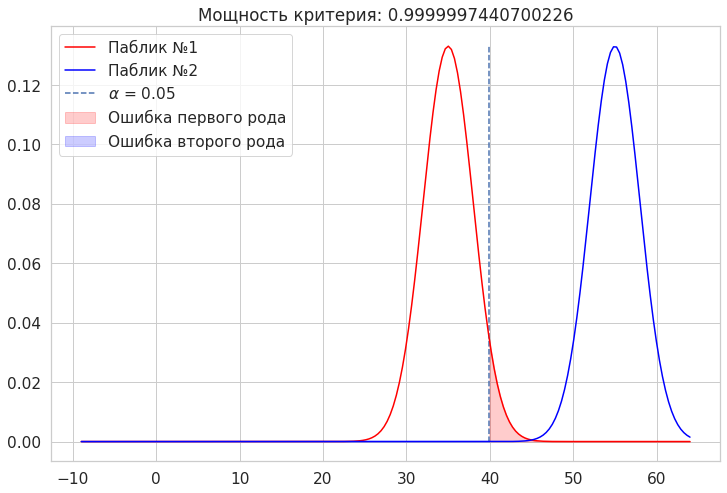

2.55929977464261e-07

In [5]:
plot_power_and_pvalue()

Теперь снова поиграйтесь с ползунком.

In [6]:
v = interactive(
    lambda n: plot_power_and_pvalue(n), n=(10, 100)
)

In [7]:
display.display(v)

interactive(children=(IntSlider(value=55, description='n', min=10), Output()), _dom_classes=('widget-interact'…

Сколько дней нужно для достижения мощности критерия $\geq 0.95$ на уровне $\alpha=0.05$?

**Ответ:** 25 дней